In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 235 GB / percent used: 6.5 %


# Check model data

In [2]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'ATM'
var_LMDZ = 'precip'

In [6]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ]

<xarray.DataArray 'precip' (time_counter: 192, lat: 143, lon: 144)>
[3953664 values with dtype=float32]
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * time_counter   (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered  (time_counter) object ...
Attributes:
    long_name:           Precip Totale liq+sol
    units:               kg/(s*m2)
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

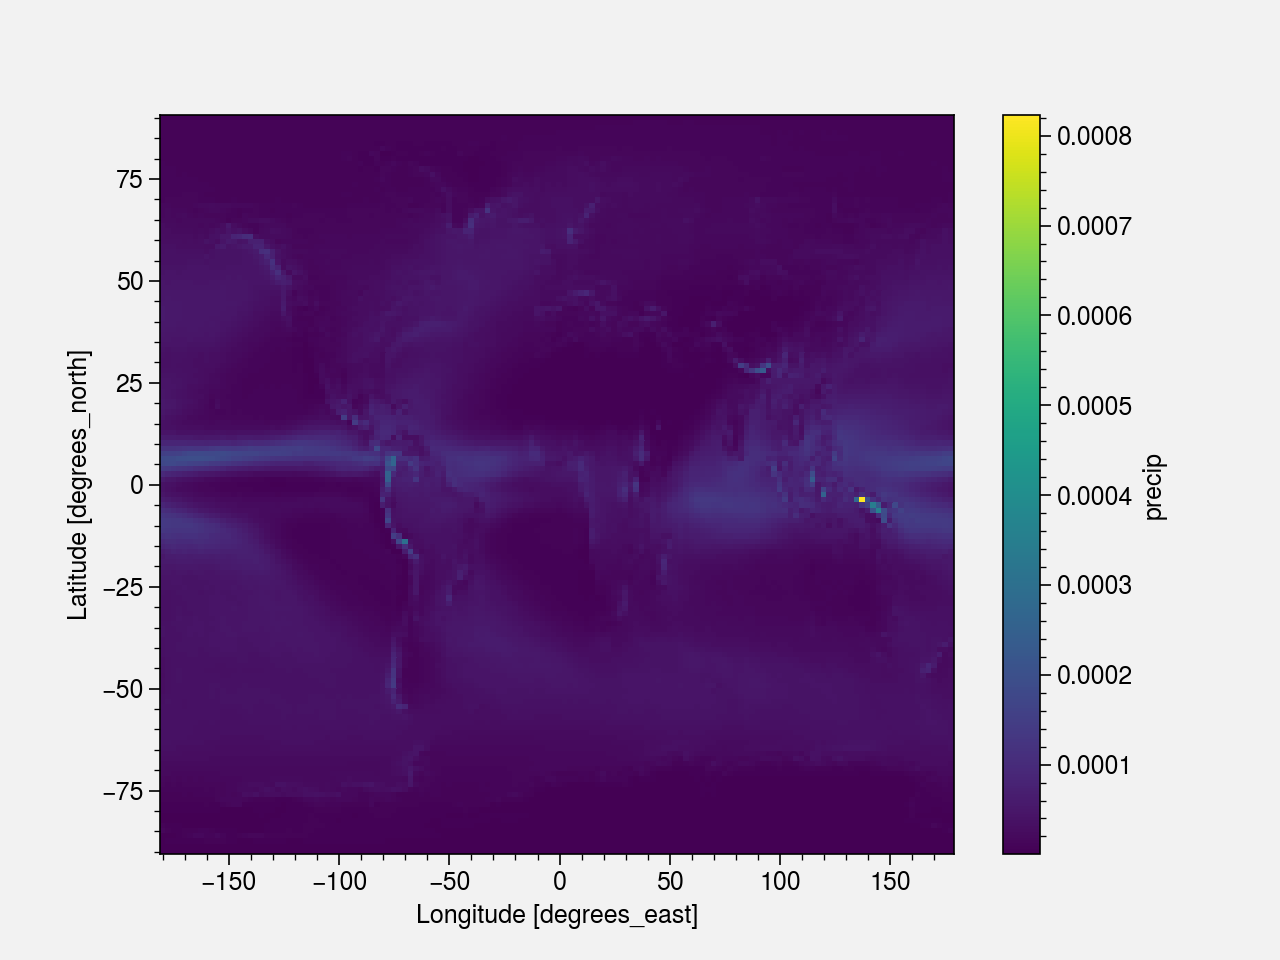

In [4]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

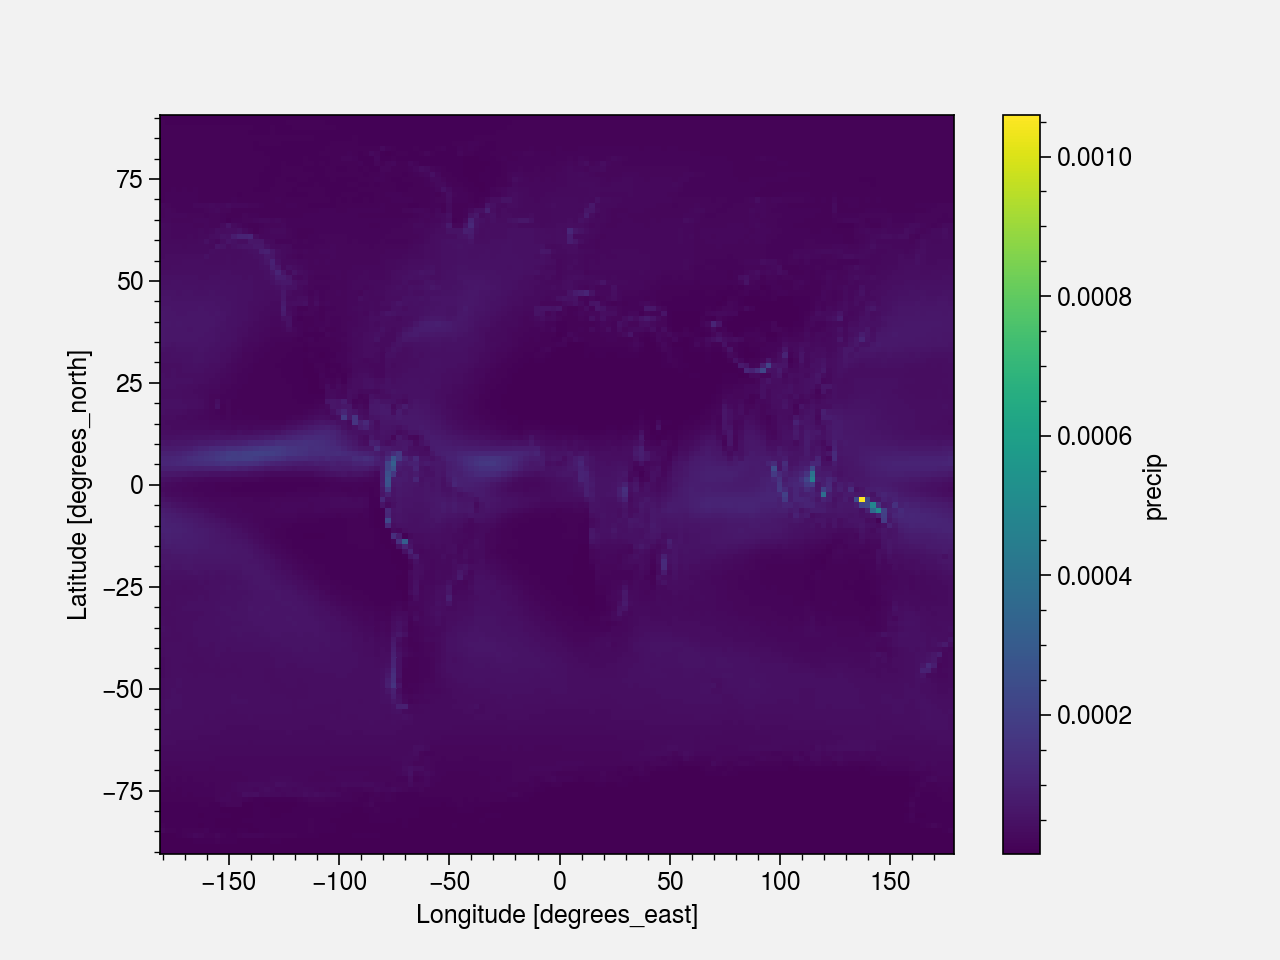

In [5]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

# Define period and zone

In [18]:
# Define common period
period = slice('1999','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'pr'
label = 'Total precipitation'
units = 'mm/day'
cmap='DryWet'
levels=plot.arange(0,5,0.5)

# Get model data guided and not guided

In [8]:
model_guided = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_guided = model_guided.rename({'time_counter': 'time'})*86400
model_guided.attrs['units'] = 'mm/day'
model_guided

<xarray.DataArray 'precip' (time: 192, lat: 143, lon: 144)>
array([[[0.24906204, 0.24906204, 0.24906204, ..., 0.24906204,
         0.24906204, 0.24906204],
        [0.68384134, 0.67603918, 0.68742374, ..., 0.66922532,
         0.68043803, 0.67284567],
        [0.74063033, 0.73149898, 0.7487766 , ..., 0.70797337,
         0.72894009, 0.73543004],
        ...,
        [0.25364149, 0.30914994, 0.29879399, ..., 0.15284743,
         0.20412922, 0.2164645 ],
        [0.08745831, 0.08918535, 0.09688932, ..., 0.11080985,
         0.1015383 , 0.08114857],
        [0.06966904, 0.06966904, 0.06966904, ..., 0.06966904,
         0.06966904, 0.06966904]],

       [[0.1852684 , 0.1852684 , 0.1852684 , ..., 0.1852684 ,
         0.1852684 , 0.1852684 ],
        [0.40934492, 0.40628214, 0.41197512, ..., 0.41461432,
         0.40464055, 0.41186118],
        [0.40362109, 0.42404558, 0.4420734 , ..., 0.38963945,
         0.39986106, 0.39848877],
        ...,
        [0.27872453, 0.37086739, 0.4120627 , ..., 0.2210597 ,
         0.25900515, 0.24290196],
        [0.15958545, 0.16294918, 0.16787873, ..., 0.20763683,
         0.19268613, 0.15555474],
        [0.09696579, 0.09696579, 0.09696579, ..., 0.09696579,
         0.09696579, 0.09696579]],

       [[0.16539355, 0.16539355, 0.16539355, ..., 0.16539355,
         0.16539355, 0.16539355],
        [0.40989994, 0.41241851, 0.43046402, ..., 0.36857292,
         0.38822147, 0.38679421],
        [0.38193087, 0.39139615, 0.40510657, ..., 0.4582595 ,
         0.47211235, 0.45237202],
        ...,
        [0.29833186, 0.43887691, 0.54760597, ..., 0.26089522,
         0.27338333, 0.24866488],
        [0.21139114, 0.20302282, 0.21945574, ..., 0.2185847 ,
         0.19632061, 0.1978921 ],
        [0.07139015, 0.07139015, 0.07139015, ..., 0.07139015,
         0.07139015, 0.07139015]],

       ...,

       [[0.37084083, 0.37084083, 0.37084083, ..., 0.37084083,
         0.37084083, 0.37084083],
        [0.43562828, 0.42571305, 0.40845661, ..., 0.48220485,
         0.4690663 , 0.48036776],
        [0.48389248, 0.42323506, 0.4545274 , ..., 0.5210868 ,
         0.53321072, 0.51565705],
        ...,
        [0.21230646, 0.27941176, 0.30788994, ..., 0.15431447,
         0.16838958, 0.16616587],
        [0.10236362, 0.09264502, 0.09635895, ..., 0.11461034,
         0.1129207 , 0.10034171],
        [0.07119595, 0.07119595, 0.07119595, ..., 0.07119595,
         0.07119595, 0.07119595]],

       [[0.55499367, 0.55499367, 0.55499367, ..., 0.55499367,
         0.55499367, 0.55499367],
        [0.67545627, 0.67808172, 0.6904204 , ..., 0.63226109,
         0.65713856, 0.66419602],
        [0.68656116, 0.66667853, 0.67446608, ..., 0.63633497,
         0.65407051, 0.65450011],
        ...,
        [0.08920615, 0.11174279, 0.11800948, ..., 0.07160575,
         0.07816241, 0.08252839],
        [0.05084772, 0.04832287, 0.04579581, ..., 0.04810131,
         0.04643173, 0.04516418],
        [0.0322471 , 0.0322471 , 0.0322471 , ..., 0.0322471 ,
         0.0322471 , 0.0322471 ]],

       [[0.16922459, 0.16922459, 0.16922459, ..., 0.16922459,
         0.16922459, 0.16922459],
        [0.25900022, 0.25811438, 0.26196598, ..., 0.26457213,
         0.27693198, 0.26911502],
        [0.34823861, 0.32133005, 0.32500845, ..., 0.33778255,
         0.32953325, 0.33624623],
        ...,
        [0.18548933, 0.21158608, 0.20961467, ..., 0.11335962,
         0.14654477, 0.16300848],
        [0.09276624, 0.09320587, 0.09834419, ..., 0.13166037,
         0.12098502, 0.09478678],
        [0.08034819, 0.08034819, 0.08034819, ..., 0.08034819,
         0.08034819, 0.08034819]]])
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * time           (time) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered  (time) object ...
Attributes:
    units:    mm/day

In [9]:
model = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model = model.rename({'time_counter': 'time'})*86400
model.attrs['units'] = 'mm/day'
model

<xarray.DataArray 'precip' (time: 192, lat: 143, lon: 144)>
array([[[0.47776597, 0.47776597, 0.47776597, ..., 0.47776597,
         0.47776597, 0.47776597],
        [0.66897897, 0.69094469, 0.67913587, ..., 0.69057348,
         0.68317388, 0.67131273],
        [0.58067081, 0.56506099, 0.58556991, ..., 0.63188583,
         0.62889357, 0.57840703],
        ...,
        [0.27053012, 0.36796711, 0.41078314, ..., 0.14622574,
         0.18513057, 0.20720031],
        [0.09729366, 0.09430747, 0.097529  , ..., 0.11015582,
         0.10506874, 0.09084792],
        [0.04176562, 0.04176562, 0.04176562, ..., 0.04176562,
         0.04176562, 0.04176562]],

       [[0.26043716, 0.26043716, 0.26043716, ..., 0.26043716,
         0.26043716, 0.26043716],
        [0.34015202, 0.33376435, 0.32044378, ..., 0.32595391,
         0.32832222, 0.34690231],
        [0.37878051, 0.38478193, 0.39148341, ..., 0.35136383,
         0.35220912, 0.36227942],
        ...,
        [0.22989487, 0.36506282, 0.45481002, ..., 0.15020552,
         0.17975241, 0.18356443],
        [0.12968097, 0.11278883, 0.11459141, ..., 0.1429523 ,
         0.13785114, 0.12457228],
        [0.05871338, 0.05871338, 0.05871338, ..., 0.05871338,
         0.05871338, 0.05871338]],

       [[0.10745154, 0.10745154, 0.10745154, ..., 0.10745154,
         0.10745154, 0.10745154],
        [0.29486281, 0.28594057, 0.28245003, ..., 0.28388237,
         0.28608244, 0.29208372],
        [0.30163933, 0.29818827, 0.29747038, ..., 0.34825389,
         0.34485769, 0.31885192],
        ...,
        [0.10532512, 0.12974389, 0.13905979, ..., 0.08491765,
         0.08367549, 0.09055073],
        [0.07770997, 0.07440031, 0.06570496, ..., 0.08381076,
         0.07667078, 0.07116058],
        [0.07013147, 0.07013147, 0.07013147, ..., 0.07013147,
         0.07013147, 0.07013147]],

       ...,

       [[0.86323885, 0.86323885, 0.86323885, ..., 0.86323885,
         0.86323885, 0.86323885],
        [0.52659249, 0.5881653 , 0.60163499, ..., 0.55020419,
         0.54149274, 0.54961264],
        [0.58909553, 0.56945826, 0.59502552, ..., 0.57511373,
         0.58000123, 0.55027562],
        ...,
        [0.09690391, 0.13911195, 0.15916859, ..., 0.0953113 ,
         0.09395747, 0.08656928],
        [0.06984142, 0.06351901, 0.06065315, ..., 0.0643312 ,
         0.06396728, 0.05701249],
        [0.05233676, 0.05233676, 0.05233676, ..., 0.05233676,
         0.05233676, 0.05233676]],

       [[0.20521231, 0.20521231, 0.20521231, ..., 0.20521231,
         0.20521231, 0.20521231],
        [0.43008624, 0.41435418, 0.41571916, ..., 0.4293978 ,
         0.42590746, 0.42194846],
        [0.48891031, 0.46245195, 0.45393157, ..., 0.4659023 ,
         0.46474901, 0.49072555],
        ...,
        [0.2756585 , 0.39764348, 0.47589296, ..., 0.18909888,
         0.20917928, 0.21694714],
        [0.11760249, 0.1100701 , 0.10985606, ..., 0.12140166,
         0.11857062, 0.10408134],
        [0.0437327 , 0.0437327 , 0.0437327 , ..., 0.0437327 ,
         0.0437327 , 0.0437327 ]],

       [[0.0814065 , 0.0814065 , 0.0814065 , ..., 0.0814065 ,
         0.0814065 , 0.0814065 ],
        [0.3573942 , 0.35505384, 0.37105697, ..., 0.31285074,
         0.31174366, 0.33906742],
        [0.49100503, 0.47672493, 0.46549423, ..., 0.45105769,
         0.44608033, 0.4671918 ],
        ...,
        [0.24737029, 0.32252865, 0.34815822, ..., 0.14420085,
         0.17474985, 0.19376549],
        [0.073861  , 0.06872668, 0.07582358, ..., 0.09272836,
         0.08818951, 0.06750411],
        [0.0523847 , 0.0523847 , 0.0523847 , ..., 0.0523847 ,
         0.0523847 , 0.0523847 ]]])
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * time           (time) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered  (time) object ...
Attributes:
    units:    mm/day

# Compute climatologies

In [10]:
calendar = model.time.encoding['calendar']
calendar

'noleap'

In [11]:
model_clim = u.clim(model, calendar=calendar)
model_guided_clim = u.clim(model_guided, calendar=calendar)

# Load obs
## APHRODITE http://aphrodite.st.hirosaki-u.ac.jp/download/data/search/  
http://aphrodite.st.hirosaki-u.ac.jp/download/
V1101 et V1101EX_R1 domain MA

http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Precipitation.ipynb

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


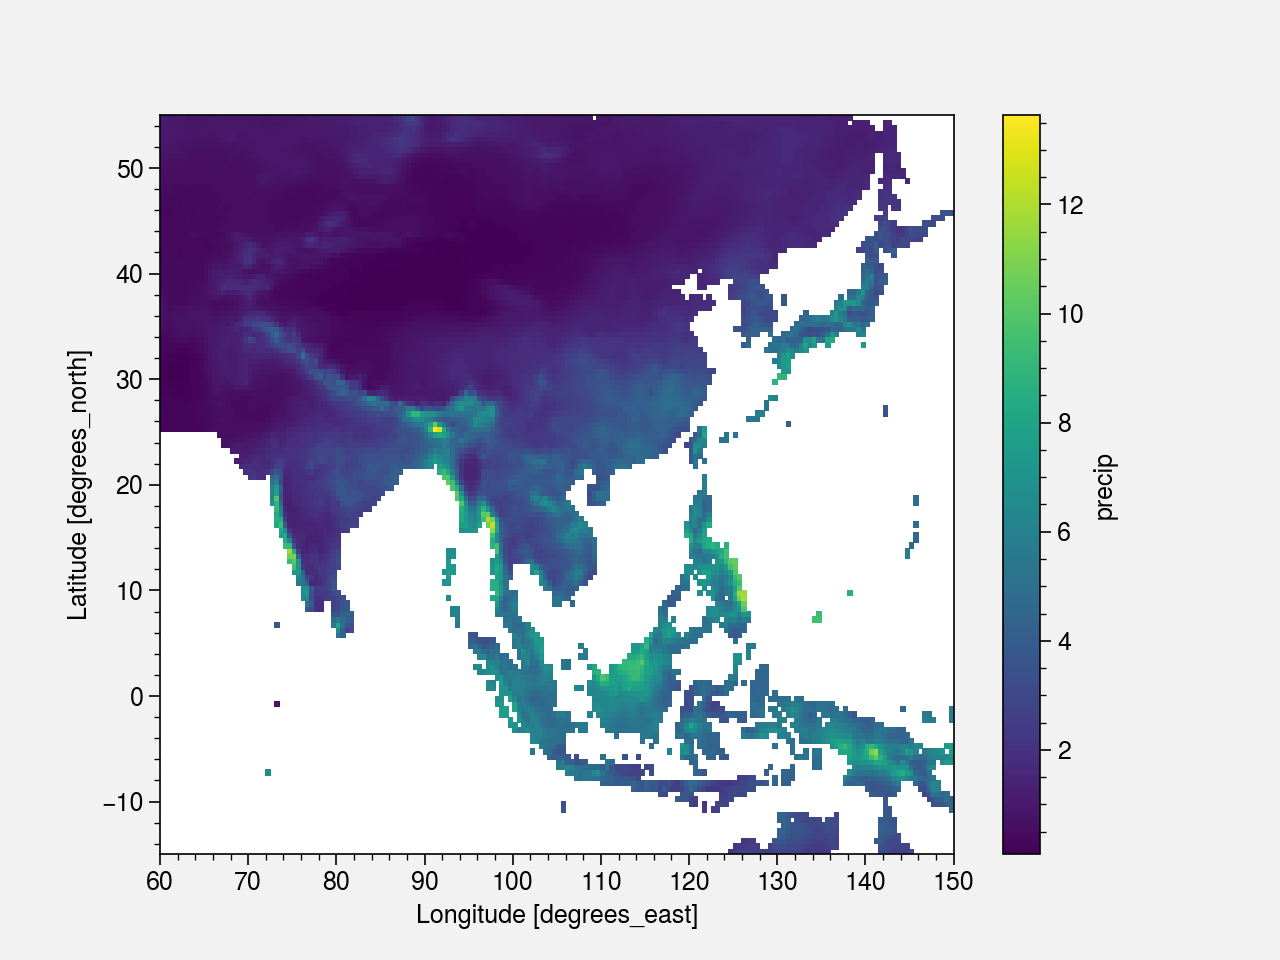

In [12]:
obs_longname = 'APHRODITE V1101 (0.5°)'
obs_name = 'APHRODITE'

obs_V1101 = xr.open_mfdataset(
    '/data/mlalande/APHRODITE/APHRO_MA_050deg_V1101.*.nc', combine='by_coords'
).precip
obs_V1101_EXR1 = xr.open_mfdataset(
    '/data/mlalande/APHRODITE/APHRO_MA_050deg_V1101_EXR1.*.nc', combine='by_coords'
).precip

obs_V1101 = obs_V1101.rename({'longitude': 'lon', 'latitude': 'lat'})
obs = xr.combine_nested([obs_V1101, obs_V1101_EXR1], concat_dim='time')
# Daily donc pas besoin de faire la clim en prenant en compte le nb de jours dans le mois
obs_clim = obs.sel(time=period).mean('time')
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

In [16]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder = xe.Regridder(obs_clim, model_clim, 'bilinear', periodic=False, reuse_weights=True)
regridder = add_matrix_NaNs(regridder)
print(regridder)

# Regrid the data
obs_clim_regrid = regridder(obs_clim)

Reuse existing file: bilinear_140x180_143x144.nc


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_140x180_143x144.nc 
Reuse pre-computed weights? True 
Input grid shape:           (140, 180) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


# Plot differences

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


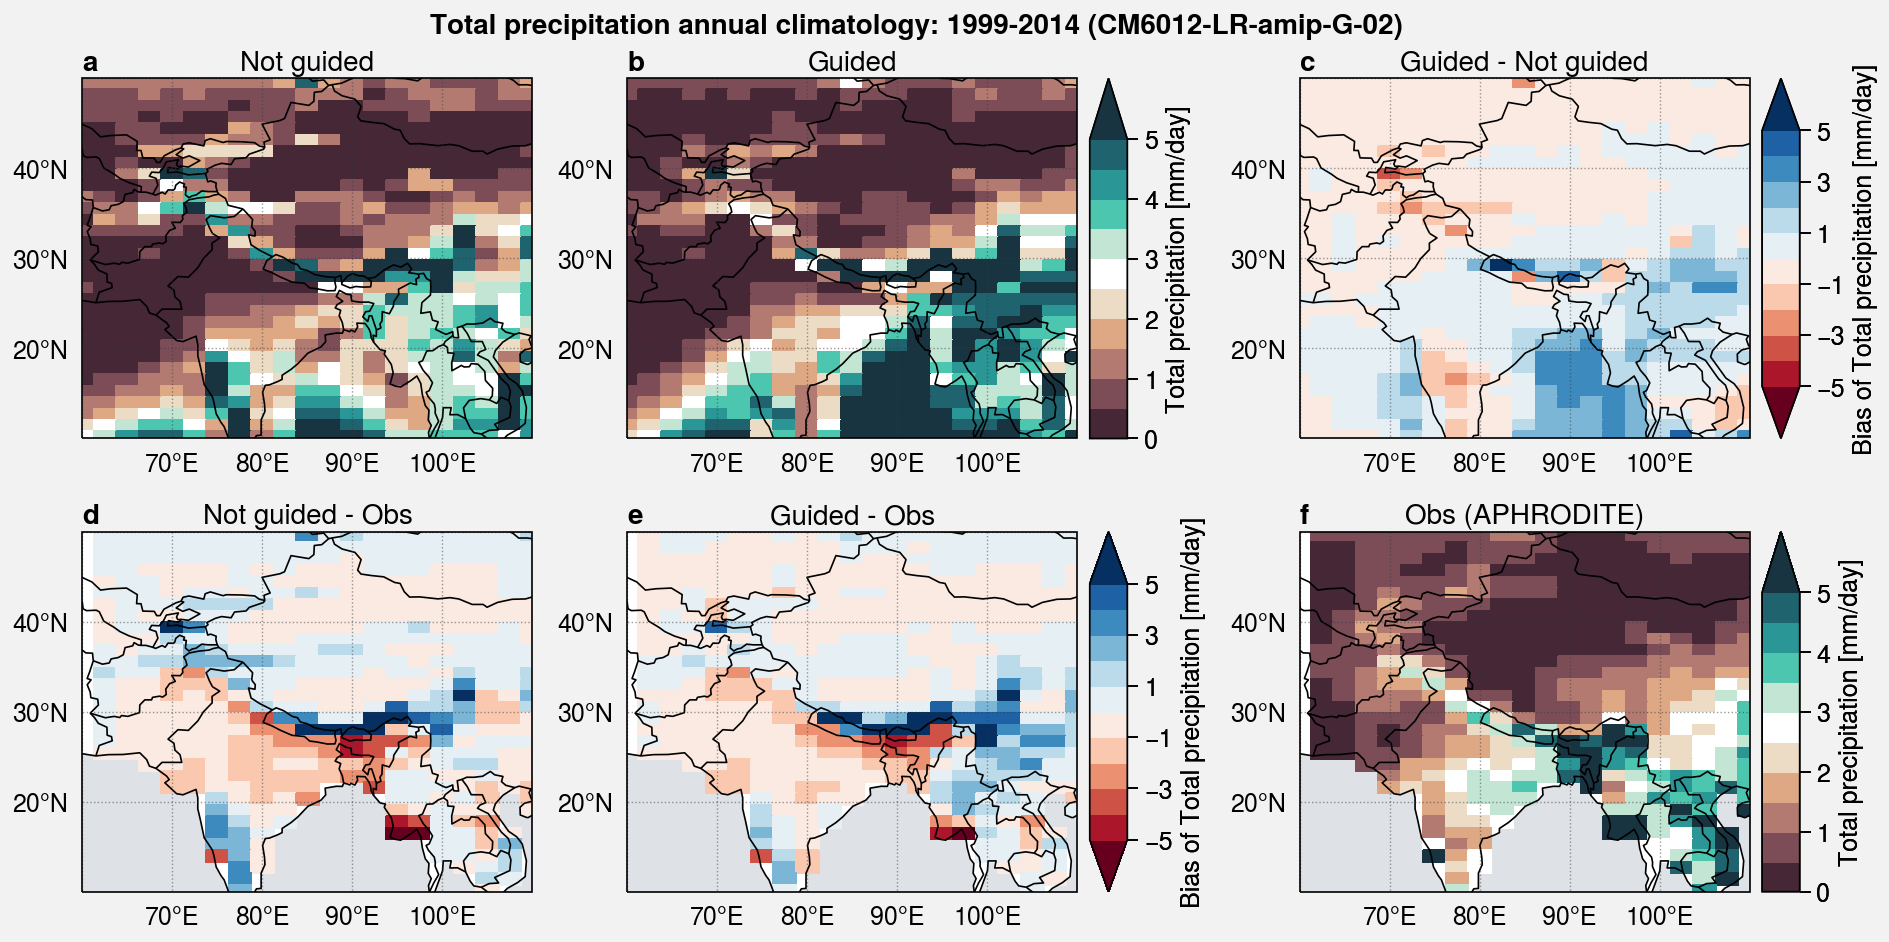

In [24]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-5,5,1)
cmap_dif = 'BuRd_r'
extend_diff = 'both'

extend='max'

# First row: differences guided / not guide
axs[0].pcolormesh(model_clim, cmap=cmap, levels=levels, extend=extend)
axs[0].format(title='Not guided')

m1 = axs[1].pcolormesh(model_guided_clim, cmap=cmap, levels=levels, extend=extend)
axs[1].format(title='Guided')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_guided_clim - model_clim, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[2].format(title='Guided - Not guided')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[3].format(title='Not guided - Obs')

axs[4].pcolormesh(model_guided_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[4].format(title='Guided - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels, extend=extend)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop+" (CM6012-LR-amip-G-02)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


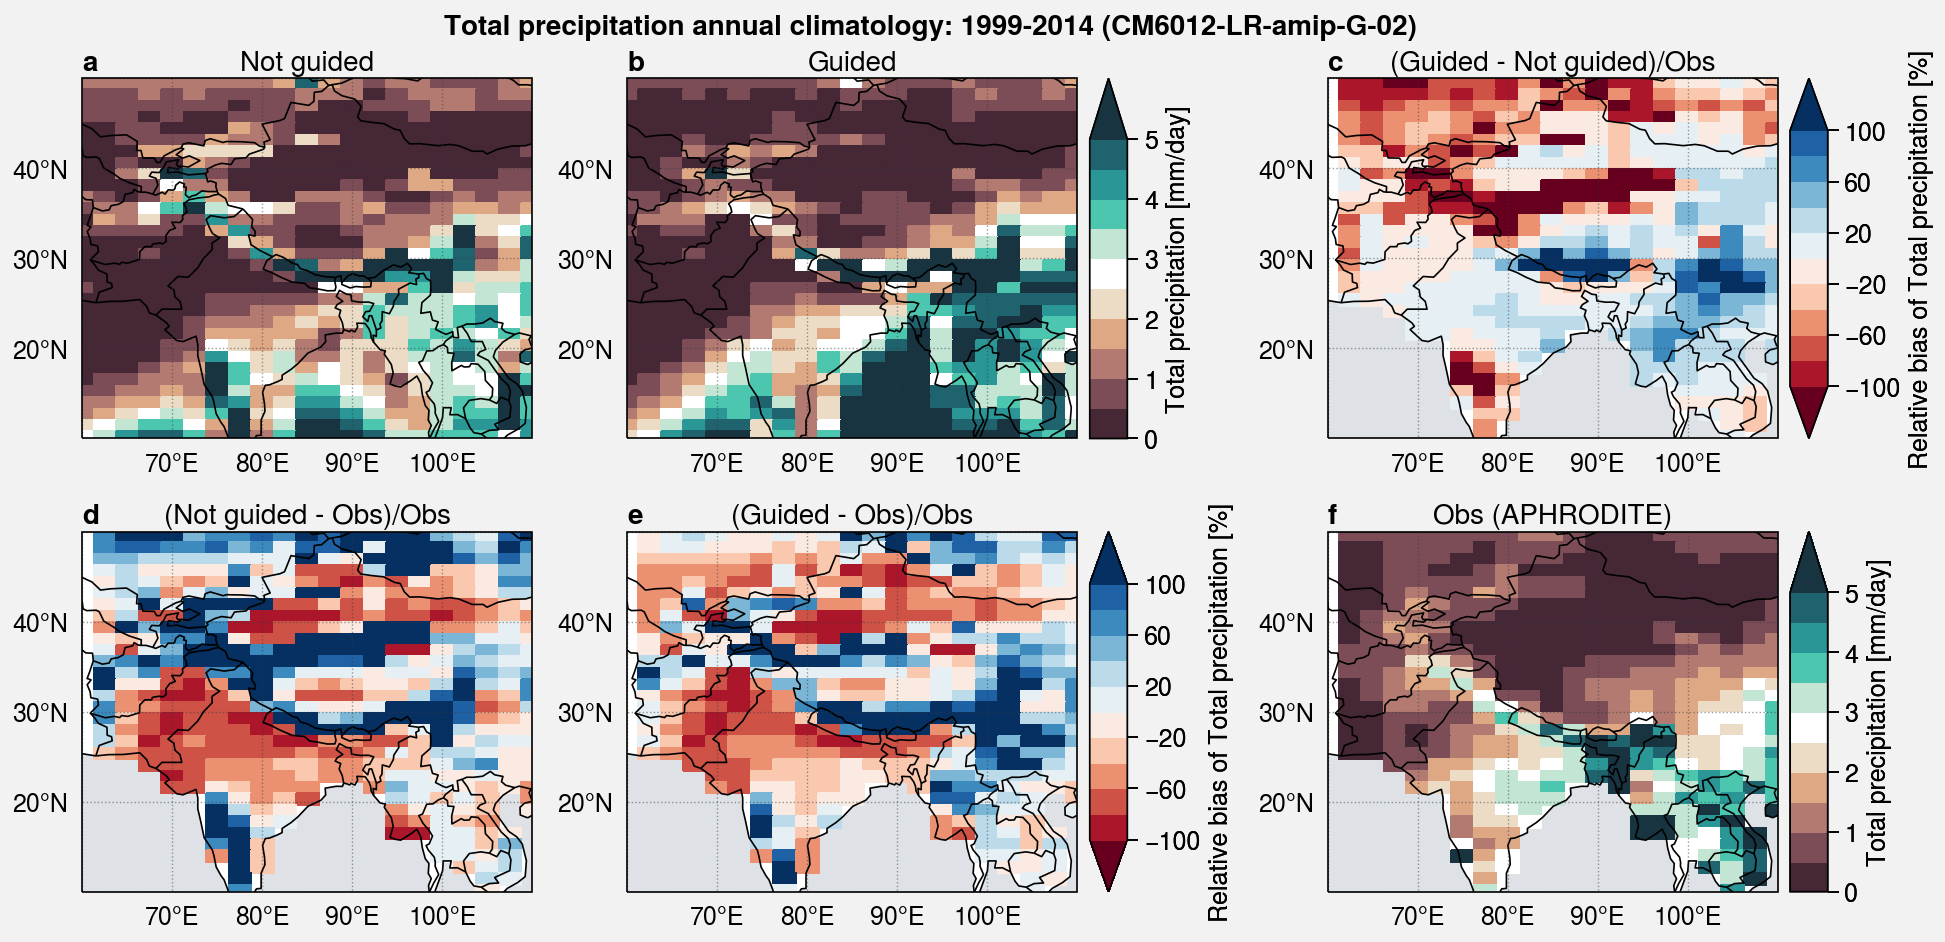

In [26]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-100,100,20)
cmap_dif = 'BuRd_r'
extend_diff = 'both'

extend='max'

# First row: differences guided / not guide
axs[0].pcolormesh(model_clim, cmap=cmap, levels=levels, extend=extend)
axs[0].format(title='Not guided')

m1 = axs[1].pcolormesh(model_guided_clim, cmap=cmap, levels=levels, extend=extend)
axs[1].format(title='Guided')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh((model_guided_clim - model_clim)/obs_clim_regrid*100, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[2].format(title='(Guided - Not guided)/Obs')
axs[2].colorbar(m2, label='Relative bias of '+label+ ' [%]')


# Second row: differences with obs

axs[3].pcolormesh((model_clim - obs_clim_regrid)/obs_clim_regrid*100, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[3].format(title='(Not guided - Obs)/Obs')

axs[4].pcolormesh((model_guided_clim - obs_clim_regrid)/obs_clim_regrid*100, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[4].format(title='(Guided - Obs)/Obs')
axs[4].colorbar(m2, label='Relative bias of '+label+ ' [%]')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels, extend=extend)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop+" (CM6012-LR-amip-G-02)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_relative_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_relative_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')